# 线性回归（单变量）
预测food truck的收益值。
ex1data1.txt：数据集，第一列表示城市人数，第二列该城市的food truck收益

## Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


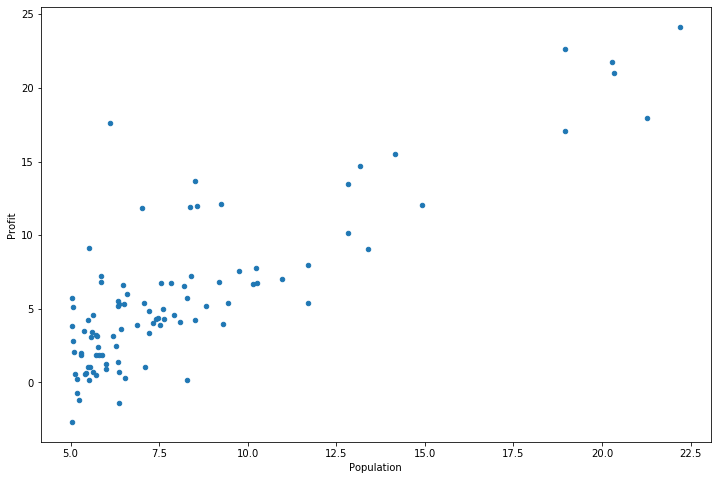

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

## 代价函数

![](img/cost.png)

In [5]:
# 新增一例，x0
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

In [7]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0]))

In [10]:
X.shape, Y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
# 代价函数
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

In [12]:
computeCost(X, Y, theta)

32.072733877455676

## 梯度下降

![](img/gradient.png)

In [13]:
# 梯度下降
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - Y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - alpha / len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    
    return theta, cost

In [14]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [15]:
# 计算训练模型的误差
computeCost(X, Y, g)

4.515955503078912

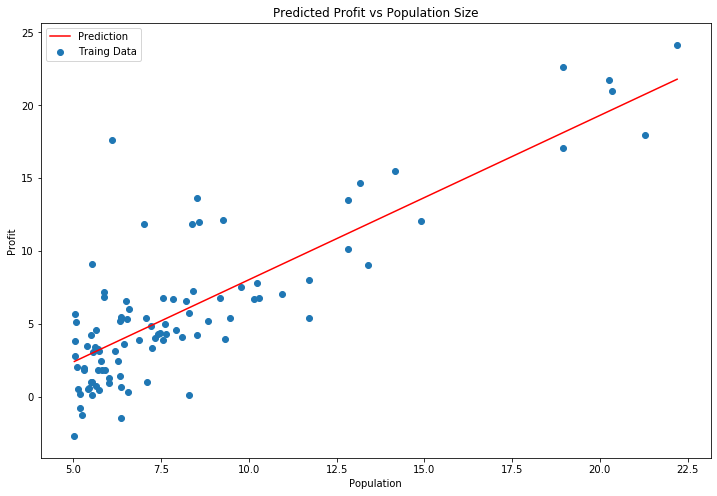

In [16]:
# 画出拟合图像
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + g[0, 1] * x

plt.figure(figsize=(12, 8))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, f, label='Prediction', color='red')
l2 = plt.scatter(data.Population, data.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()

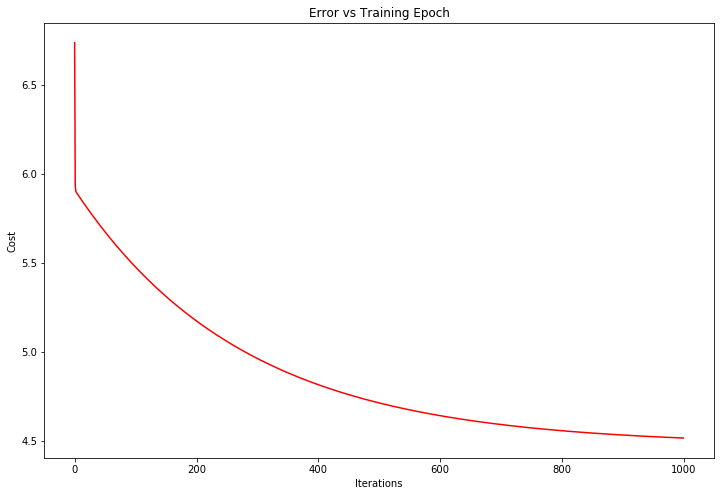

In [17]:
# 画出cost的走势
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs Training Epoch')
plt.plot(np.arange(iters), cost, 'r')
plt.show()